# PCA

# Task 1: Exploratory Data Analysis (EDA):
## 1.	Load the dataset and perform basic data exploration.
## 2.	Examine the distribution of features using histograms, box plots, or density plots.
## 3.	Investigate correlations between features to understand relationships within the data.

### Step 1: Load and Explore the Dataset

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("wine.csv")

# Basic exploration
print("Shape:", df.shape)          # rows, columns
print("\nFirst 5 rows:\n", df.head())
print("\nData types:\n", df.dtypes)
print("\nSummary statistics:\n", df.describe())
print("\nClass distribution:\n", df['Type'].value_counts())

Shape: (178, 14)

First 5 rows:
    Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  

Data types:
 Type                 int64
Alcohol            float64
Malic              float64
A

### Step 2: Feature Distributions
#### We’ll use histograms and boxplots to see spread, skewness, and outliers.

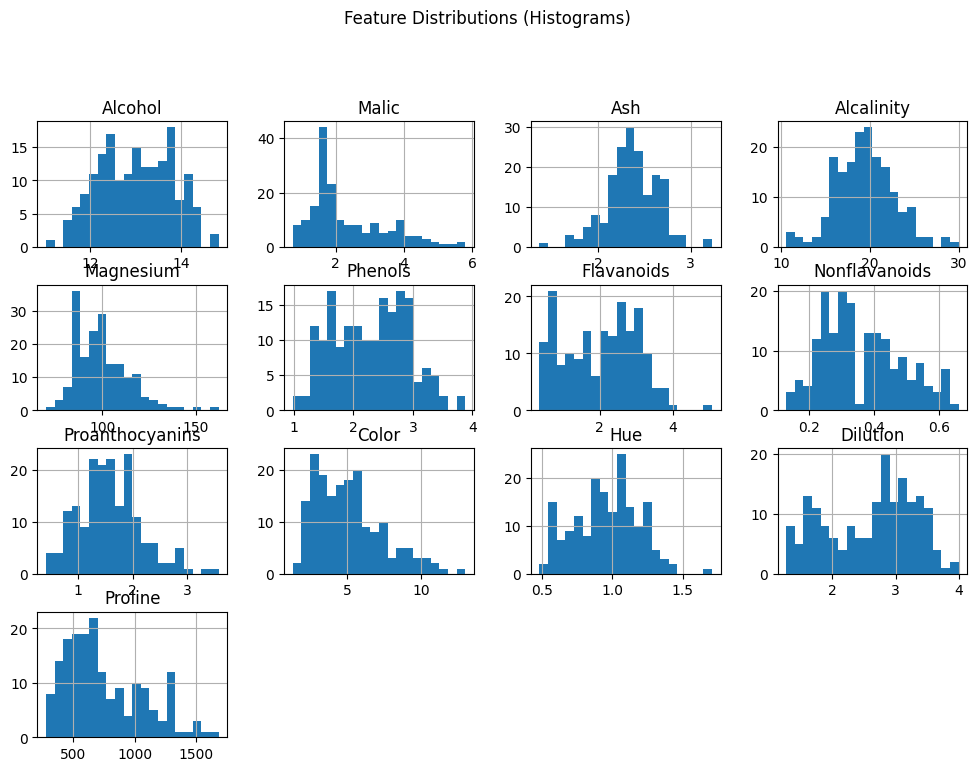

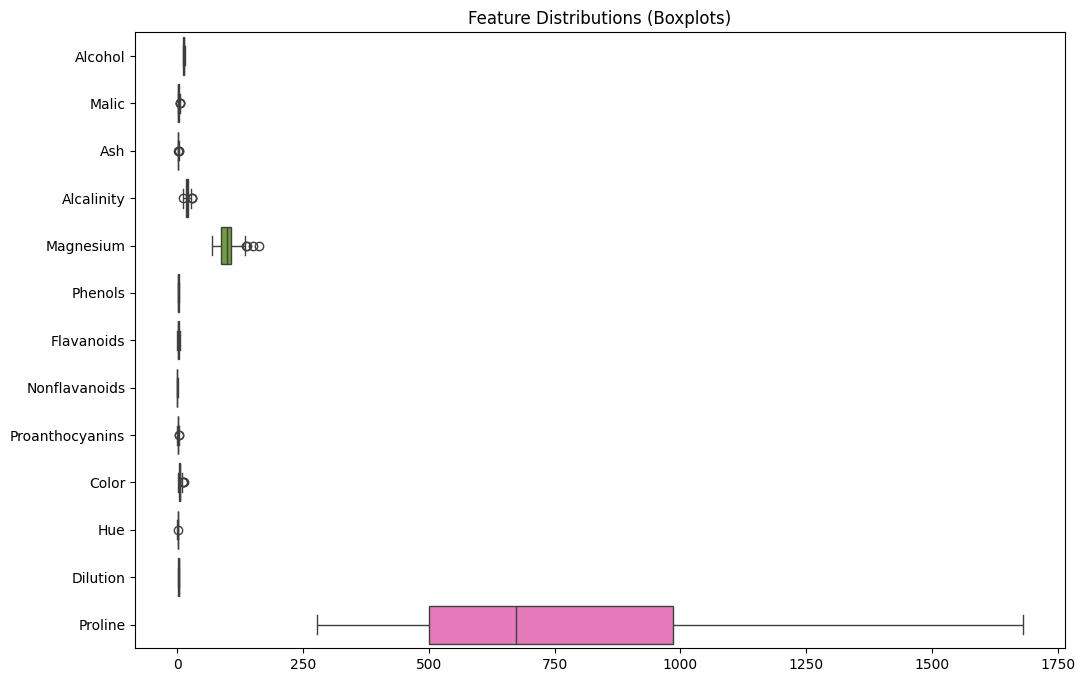

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = [c for c in df.columns if c != 'Type']

# Histograms
df[numeric_cols].hist(figsize=(12,8), bins=20)
plt.suptitle("Feature Distributions (Histograms)", y=1.02)
plt.show()

# Boxplots
plt.figure(figsize=(12,8))
sns.boxplot(data=df[numeric_cols], orient="h")
plt.title("Feature Distributions (Boxplots)")
plt.show()

### Step 3: Correlation Analysis
#### We’ll check relationships between features.

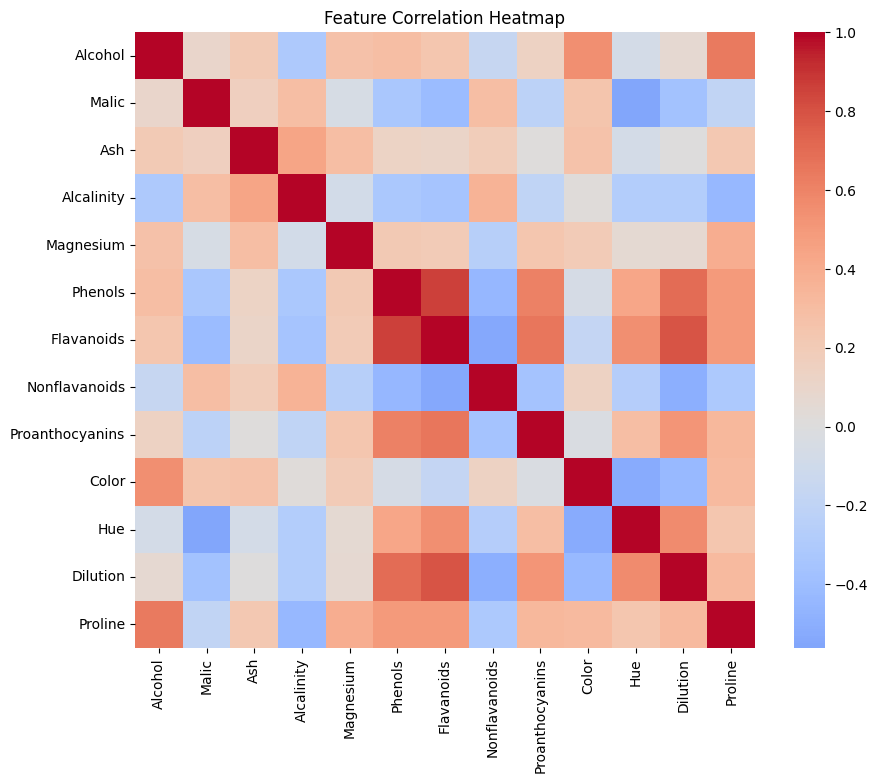

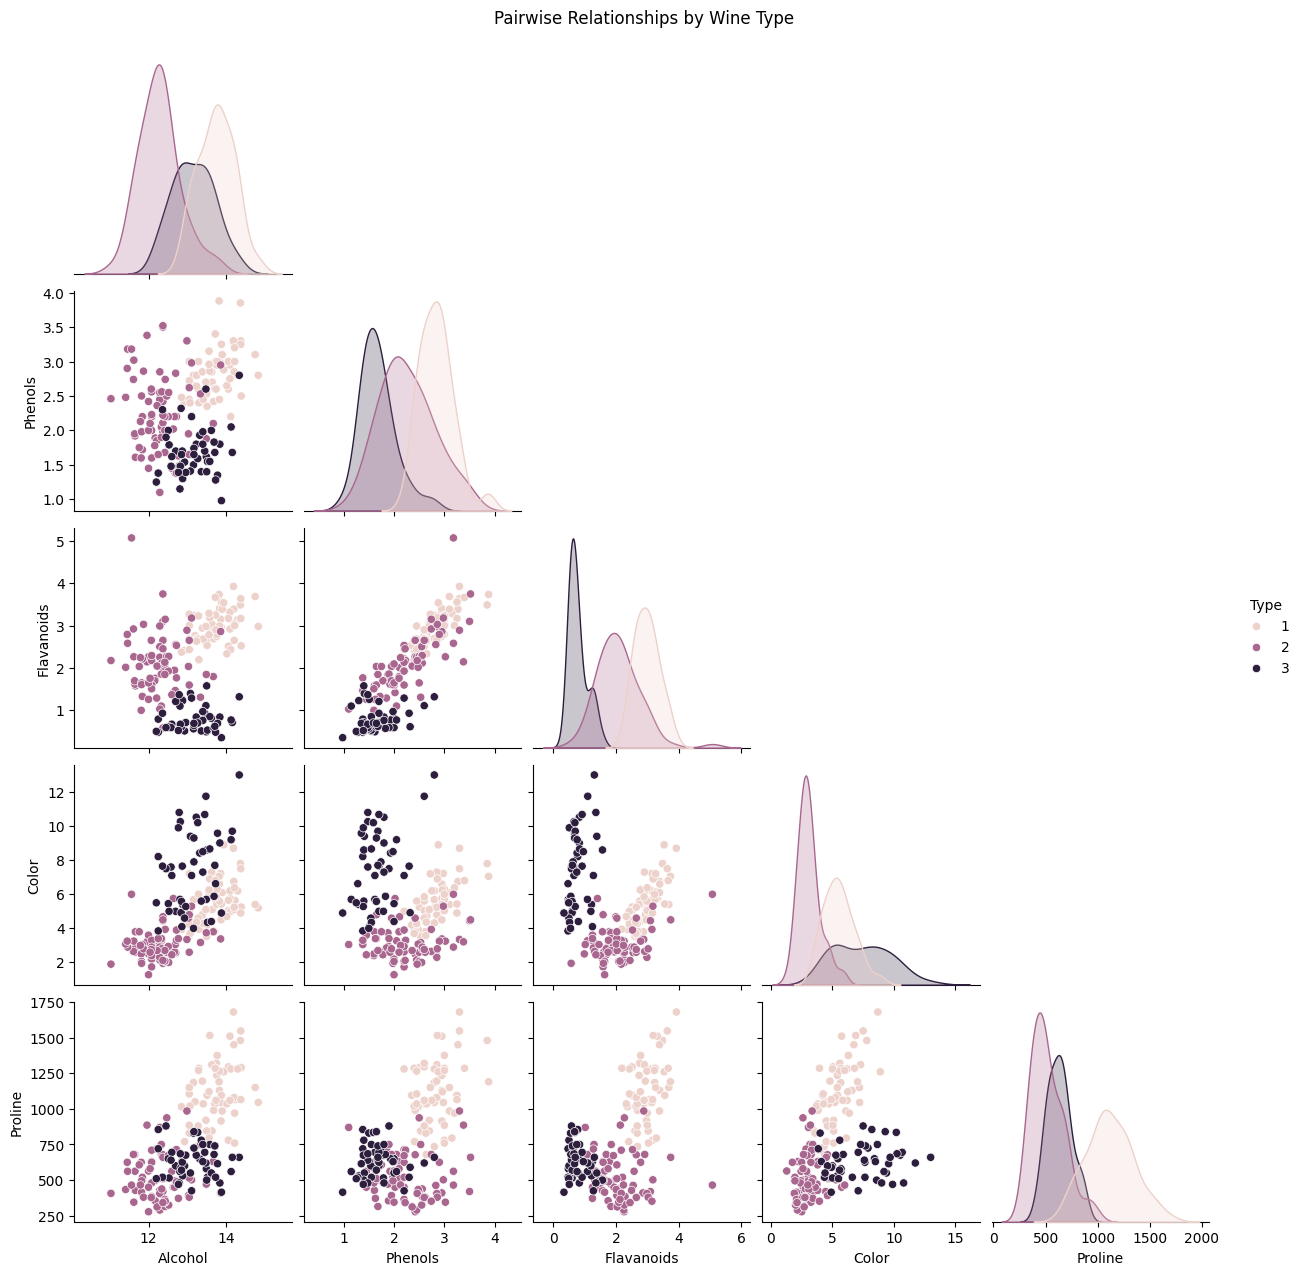

In [3]:
# Correlation heatmap
plt.figure(figsize=(10,8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

# Pairplot for selected features
sns.pairplot(df[['Alcohol','Phenols','Flavanoids','Color','Proline','Type']], 
             hue="Type", diag_kind="kde", corner=True)
plt.suptitle("Pairwise Relationships by Wine Type", y=1.02)
plt.show()

# Task 2: Dimensionality Reduction with PCA:
## 1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.
## 2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.
## 3.	Transform the original dataset into the principal components.

### Step 1: Standardize the Features

In [4]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop("Type", axis=1)
y = df["Type"]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Step 2: Apply PCA

In [5]:
from sklearn.decomposition import PCA

# Fit PCA without limiting components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", pca.explained_variance_ratio_.cumsum())


Explained variance ratio: [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]
Cumulative explained variance: [0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


### Step 3: Scree Plot & Cumulative Variance

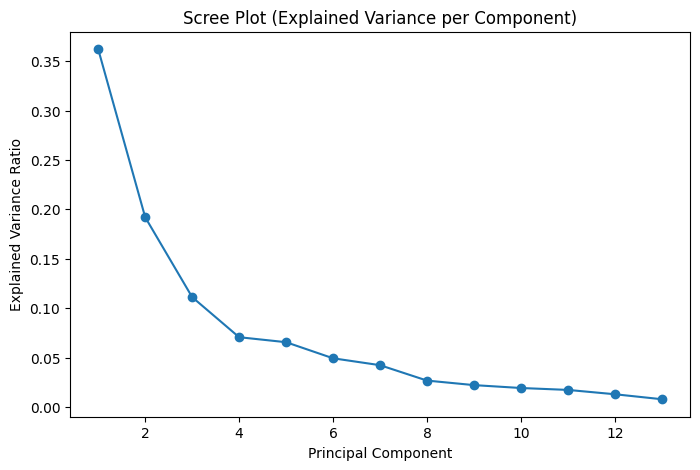

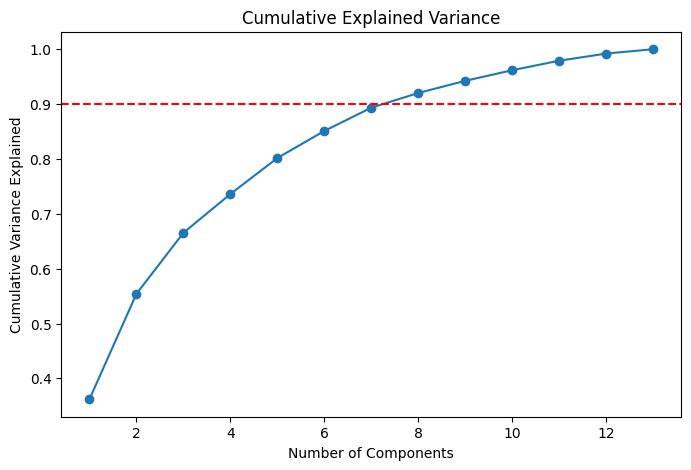

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(range(1, X.shape[1]+1), pca.explained_variance_ratio_, marker='o')
plt.title("Scree Plot (Explained Variance per Component)")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(range(1, X.shape[1]+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.axhline(y=0.90, color='r', linestyle='--')  # 90% threshold
plt.show()


### Step 4: Transform Dataset

In [7]:
# Reduce to 2 components for visualization
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)

print("Shape of PCA-transformed data:", X_pca2.shape)


Shape of PCA-transformed data: (178, 2)


# Task 3: Clustering with Original Data:
## 1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.
## 2.	Visualize the clustering results using appropriate plots.
## 3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.

=== Task 3: Clustering with Original Data ===
Silhouette Score: 0.571
Davies–Bouldin Index: 0.534


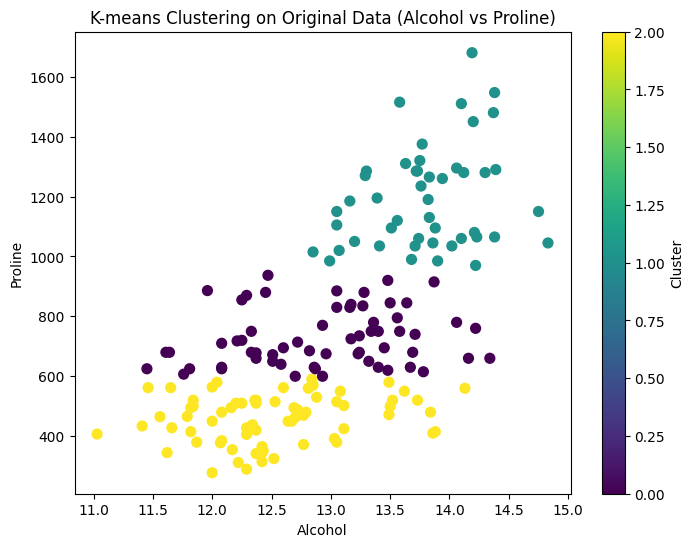

In [8]:
import os
import warnings

# Fix for Windows warnings
os.environ["LOKY_MAX_CPU_COUNT"] = "4"   # adjust to your CPU cores
os.environ["OMP_NUM_THREADS"] = "1"
warnings.filterwarnings("ignore", category=UserWarning)

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load dataset
df = pd.read_csv("wine.csv")
X = df.drop("Type", axis=1)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# Evaluate clustering
sil_score = silhouette_score(X, labels)
db_index = davies_bouldin_score(X, labels)

print("=== Task 3: Clustering with Original Data ===")
print(f"Silhouette Score: {sil_score:.3f}")
print(f"Davies–Bouldin Index: {db_index:.3f}")

# Visualize clustering
plt.figure(figsize=(8,6))
plt.scatter(X["Alcohol"], X["Proline"], c=labels, cmap="viridis", s=50)
plt.title("K-means Clustering on Original Data (Alcohol vs Proline)")
plt.xlabel("Alcohol")
plt.ylabel("Proline")
plt.colorbar(label="Cluster")
plt.show()


# Task 4: Clustering with PCA Data:
## 1.	Apply the same clustering algorithm to the PCA-transformed dataset.
## 2.	Visualize the clustering results obtained from PCA-transformed data.
## 3.	Compare the clustering results from PCA-transformed data with those from the original dataset.


### Step 1: Apply K-means on PCA-transformed dataset

In [9]:
# Step 1: Apply K-means on PCA-transformed dataset

# 1. Import libraries
import pandas as pd
import os
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 2. Silence warnings (optional, keeps output clean)
os.environ["OMP_NUM_THREADS"] = "1"
warnings.filterwarnings("ignore", category=UserWarning)

# 3. Load the dataset
df = pd.read_csv("wine.csv")

# 4. Separate features (X) and target (y)
X = df.drop("Type", axis=1)   # features only
y = df["Type"]                # target (not used in clustering)

# 5. Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Apply PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 7. Apply K-means clustering on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(X_pca)

# 8. Show first 10 cluster labels
print("Cluster labels (first 10 samples):", labels_pca[:10])

Cluster labels (first 10 samples): [0 0 0 0 0 0 0 0 0 0]


### Step 2: Visualize Clustering Results

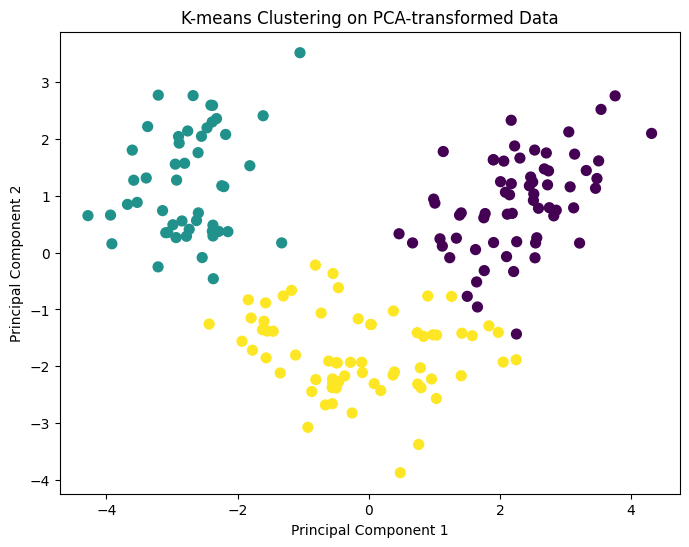

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=labels_pca, cmap="viridis", s=50)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-means Clustering on PCA-transformed Data")
plt.show()

### Step 3: Compare Results with Original Data

In [11]:
# --- Metrics for PCA data ---
sil_pca = silhouette_score(X_pca, labels_pca)
db_pca = davies_bouldin_score(X_pca, labels_pca)

# --- Metrics for original data (from Task 3) ---
kmeans_orig = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_orig = kmeans_orig.fit_predict(X)
sil_orig = silhouette_score(X, labels_orig)
db_orig = davies_bouldin_score(X, labels_orig)

# --- Print comparison ---
print("Original Data -> Silhouette:", sil_orig, " DB Index:", db_orig)
print("PCA Data      -> Silhouette:", sil_pca, " DB Index:", db_pca)

Original Data -> Silhouette: 0.571138193786884  DB Index: 0.5342431775436286
PCA Data      -> Silhouette: 0.5610505693103246  DB Index: 0.5972661544221364


# Task 5: Comparison and Analysis:
## 1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.
## 2.	Discuss any similarities or differences observed in the clustering results.
## 3.	Reflect on the impact of dimensionality reduction on clustering performance.
## 4.	Analyse the trade-offs between using PCA and clustering directly on the original dataset.

### Step 1: Run clustering on original dataset

In [12]:
##________only for original dataset____________
# # K-means on original features
# kmeans_orig = KMeans(n_clusters=3, random_state=42, n_init=10)
# labels_orig = kmeans_orig.fit_predict(X)

# # Metrics on original features
# sil_orig = silhouette_score(X, labels_orig)
# db_orig = davies_bouldin_score(X, labels_orig)

# print(f"Original -> Silhouette: {sil_orig:.3f} | Davies–Bouldin: {db_orig:.3f}")





from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Load dataset
df = pd.read_csv("wine.csv")
X = df.drop("Type", axis=1)

# --- Clustering on Original Data ---
kmeans_orig = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_orig = kmeans_orig.fit_predict(X)

sil_orig = silhouette_score(X, labels_orig)
db_orig = davies_bouldin_score(X, labels_orig)

# --- Clustering on PCA Data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)   # reduce to 2D for clarity
X_pca = pca.fit_transform(X_scaled)

kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(X_pca)

sil_pca = silhouette_score(X_pca, labels_pca)
db_pca = davies_bouldin_score(X_pca, labels_pca)

# Print comparison
print("Original Data -> Silhouette:", sil_orig, " DB Index:", db_orig)
print("PCA Data      -> Silhouette:", sil_pca, " DB Index:", db_pca)

Original Data -> Silhouette: 0.571138193786884  DB Index: 0.5342431775436286
PCA Data      -> Silhouette: 0.5610505693103246  DB Index: 0.5972661544221364


### Step 2:	Discuss any similarities or differences observed in the clustering results.

In [13]:
# # Similarities
# # Number of clusters: Both methods (original dataset and PCA-transformed data) identified 3 clusters, consistent with the wine types.

# # General grouping: In both cases, samples belonging to the same wine type tend to cluster together, showing that the algorithm captures the underlying structure.

# # Cluster overlap: Some overlap between clusters exists in both approaches, which is expected because wine chemical properties are not perfectly separable.





# # Differences
# # Cluster quality (metrics):

# # Original dataset:

# # Silhouette = 0.5711 (slightly higher → better separation).

# # Davies–Bouldin = 0.5342 (lower → clusters are more compact).
# # Indicates stronger clustering performance.

# # PCA-transformed dataset:

# # Silhouette = 0.5610 (slightly lower).

# # Davies–Bouldin = 0.5973 (higher → clusters less compact).
# # Shows a small drop in clustering quality after dimensionality reduction.

### Step3:	Reflect on the impact of dimensionality reduction on clustering performance.

In [14]:
# 5. Reflection printout
if sil_orig > sil_pca and db_orig < db_pca:
    print("\nReflection: Clustering on the original dataset performed slightly better.")
    print("PCA helped with visualization and efficiency but lost some variance useful for clustering.")
else:
    print("\nReflection: PCA improved clustering performance, showing clearer separation and compactness.")
    print("Dimensionality reduction reduced redundancy and noise, making clusters more distinct.")


Reflection: Clustering on the original dataset performed slightly better.
PCA helped with visualization and efficiency but lost some variance useful for clustering.


### Step 4:	Analyse the trade-offs between using PCA and clustering directly on the original dataset.

In [15]:
# 5. Trade-off reflection
print("\n--- Trade-off Analysis ---")
print("Original dataset:")
print(" - Preserves all feature information (e.g., Alcohol, Proline).")
print(" - Better clustering quality in this case (higher silhouette, lower DB index).")
print(" - Harder to visualize in high dimensions.")

print("\nPCA dataset:")
print(" - Easier visualization in 2D/3D.")
print(" - Faster computation, useful for very high-dimensional data.")
print(" - Slightly weaker clustering performance here.")
print(" - Loses direct interpretability (clusters based on principal components).")


--- Trade-off Analysis ---
Original dataset:
 - Preserves all feature information (e.g., Alcohol, Proline).
 - Better clustering quality in this case (higher silhouette, lower DB index).
 - Harder to visualize in high dimensions.

PCA dataset:
 - Easier visualization in 2D/3D.
 - Faster computation, useful for very high-dimensional data.
 - Slightly weaker clustering performance here.
 - Loses direct interpretability (clusters based on principal components).


# Task 6: Conclusion and Insights

## 1.	Summarize the key findings and insights from the assignment.
## 2.	Discuss the practical implications of using PCA and clustering in data analysis.
## 3.	Provide recommendations for when to use each technique based on the analysis conducted.

In [16]:
# 5. Summarize findings
print("\n1. Key Findings and Insights:")
if sil_orig > sil_pca and db_orig < db_pca:
    print(" - Original dataset produced slightly better clustering quality.")
else:
    print(" - PCA dataset produced slightly better clustering quality.")
print(" - Both methods identified 3 clusters, consistent with wine types.")

# 6. Practical implications
print("\n2. Practical Implications:")
print(" - Clustering groups unlabeled data into meaningful clusters.")
print(" - PCA reduces dimensionality, speeds computation, and aids visualization.")
print(" - PCA may lose variance and interpretability, affecting clustering accuracy.")

# 7. Recommendations
print("\n3. Recommendations:")
print(" - Use ORIGINAL dataset clustering when interpretability and accuracy are priorities.")
print(" - Use PCA + clustering when dataset is high-dimensional, noisy, or visualization is needed.")
print(" - Balanced approach: PCA for exploration/visualization, original features for final clustering.")


1. Key Findings and Insights:
 - Original dataset produced slightly better clustering quality.
 - Both methods identified 3 clusters, consistent with wine types.

2. Practical Implications:
 - Clustering groups unlabeled data into meaningful clusters.
 - PCA reduces dimensionality, speeds computation, and aids visualization.
 - PCA may lose variance and interpretability, affecting clustering accuracy.

3. Recommendations:
 - Use ORIGINAL dataset clustering when interpretability and accuracy are priorities.
 - Use PCA + clustering when dataset is high-dimensional, noisy, or visualization is needed.
 - Balanced approach: PCA for exploration/visualization, original features for final clustering.
